In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)

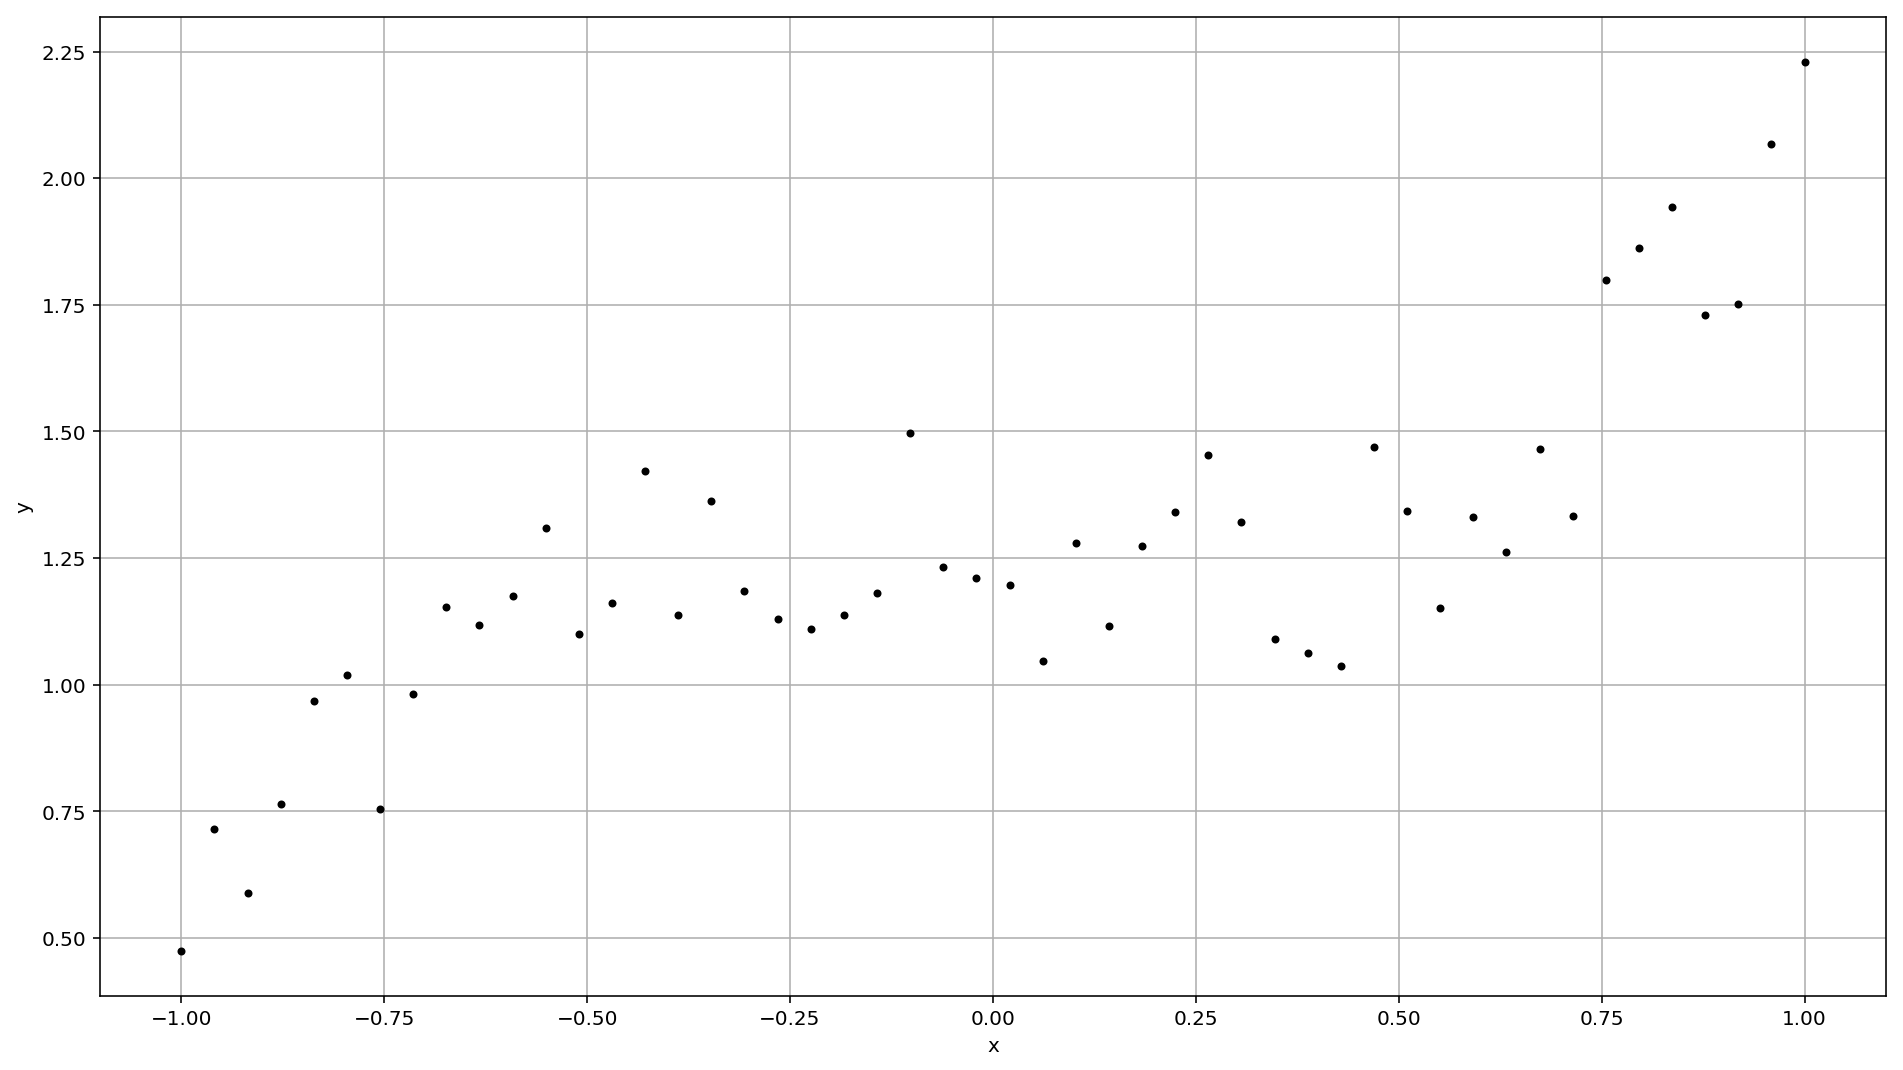

In [3]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2 -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

plt.plot(x_train, y_train, '.k')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# 특성값 정의
features1 = np.array([[xval] for xval in x_train])
features2 = np.array([[xval**2, xval] for xval in x_train])
features3 = np.array([[xval**3, xval**2, xval] for xval in x_train])
features4 = np.array([[np.cos(np.pi * xval), np.sin(np.pi * xval)] for xval in x_train])
labels = y_train.reshape(-1, 1)

In [5]:
def visualize_l2(pred, x_input, y_train):
    from matplotlib.patches import Rectangle
    plt.plot(x_input, y_train, '.k', markerfacecolor='none')
    plt.plot(x_input, pred,  '--k')
    currentAxis = plt.gca()
    for k, (xx,yy) in enumerate(zip(x_train, y_train)):
        error = pred[k] - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')

[[1.]] [1.] 0.2125635
[[0.5135189]] [1.2713628] 0.045872256
[[0.4424453]] [1.2667447] 0.044767123


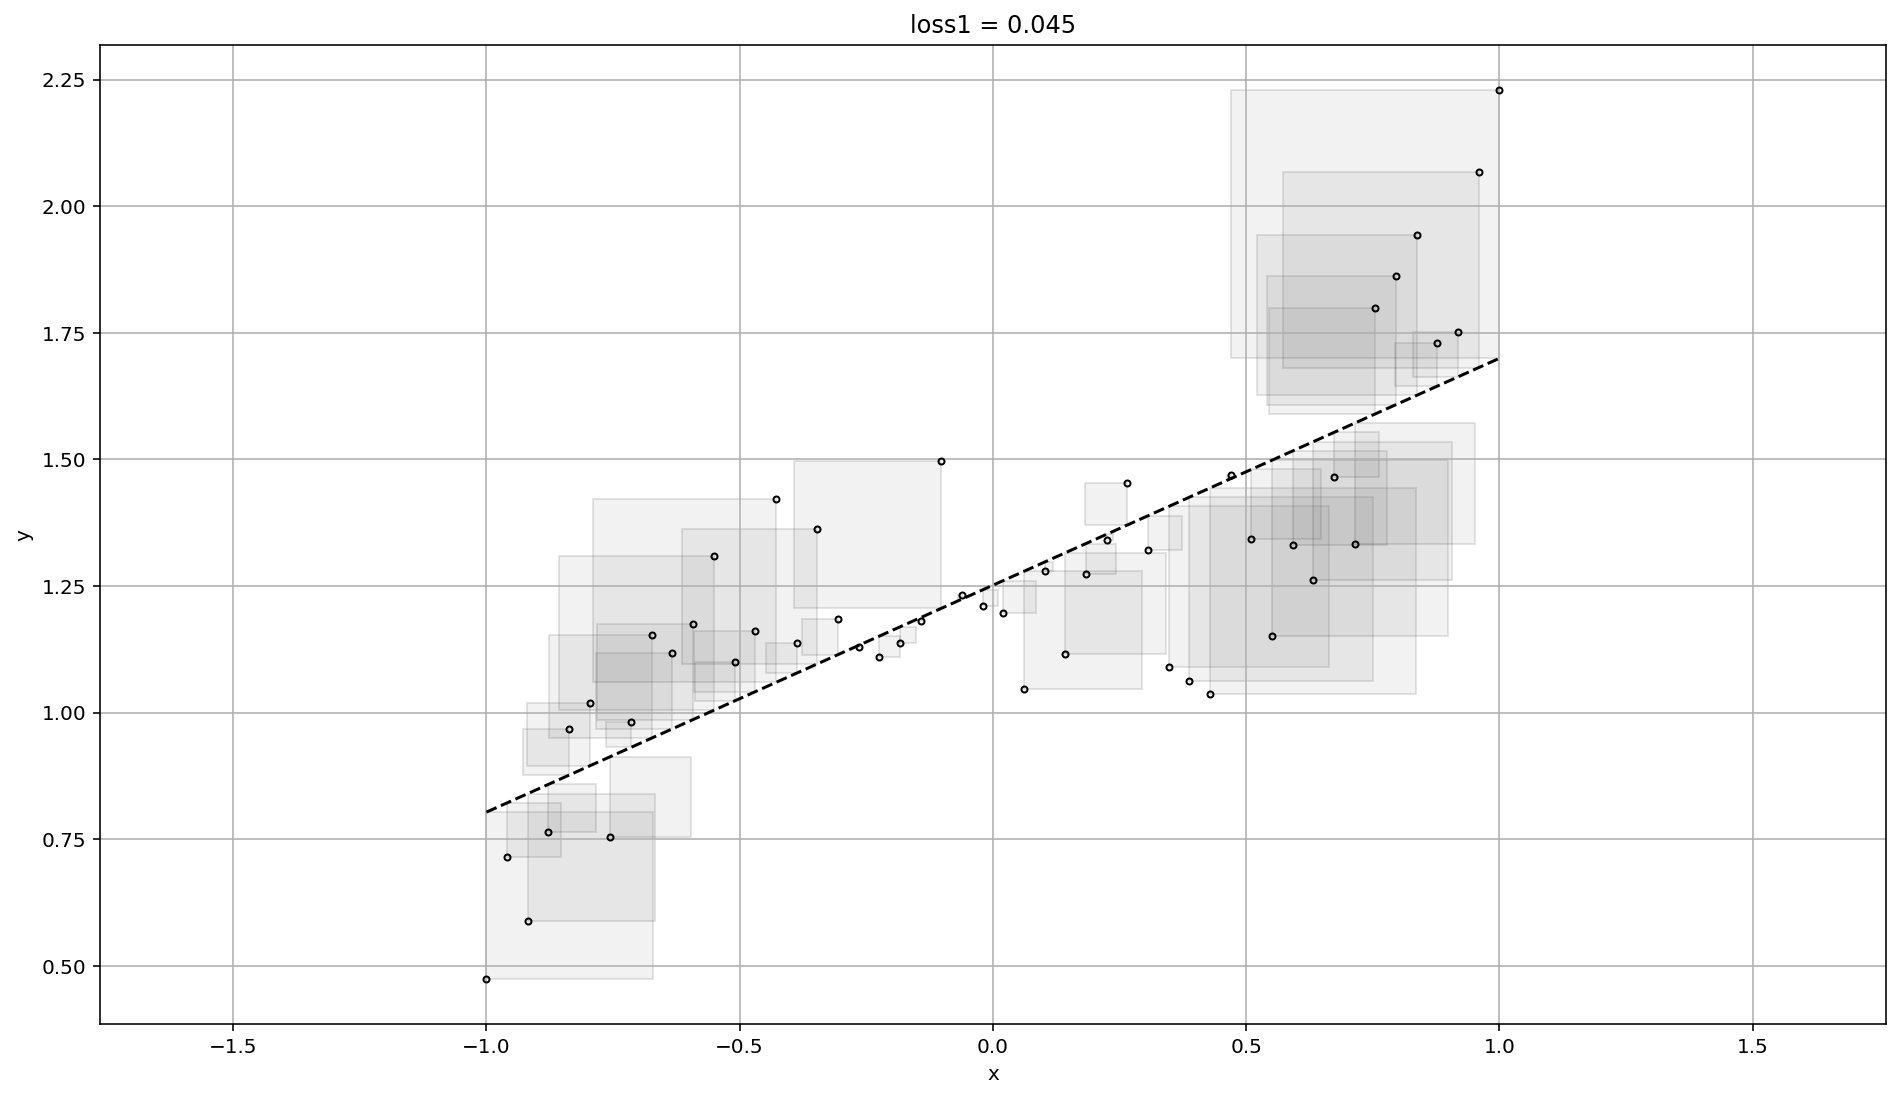

[[1. 1.]] [1.] 0.22603135
[[-0.04760738  0.54382294]] [1.2689118] 0.048572168
[[0.17435768 0.4675408 ]] [1.1939598] 0.043223694


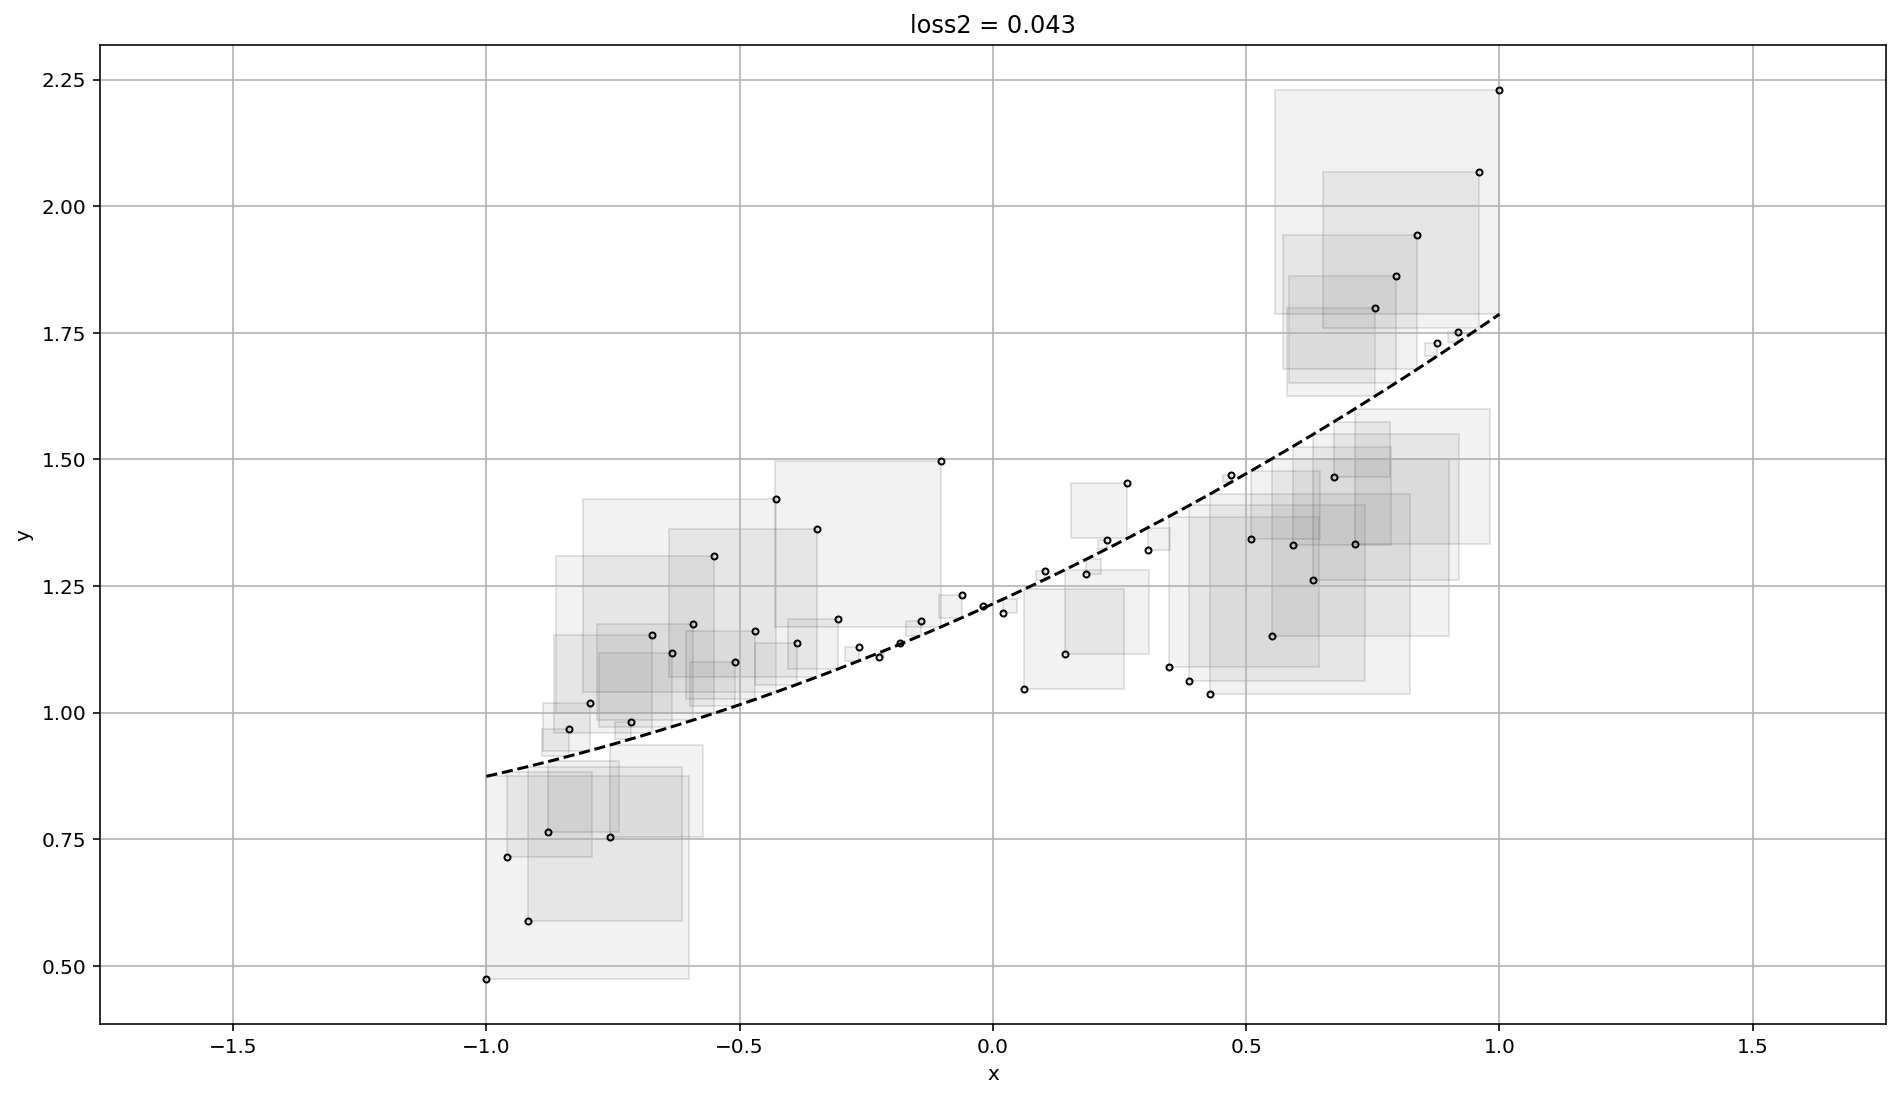

[[1. 1. 1.]] [1.] 0.57014674
[[ 0.43707478 -0.01973689  0.19586757]] [1.2126836] 0.030156227
[[0.610572   0.1590897  0.02455756]] [1.2120947] 0.022248378


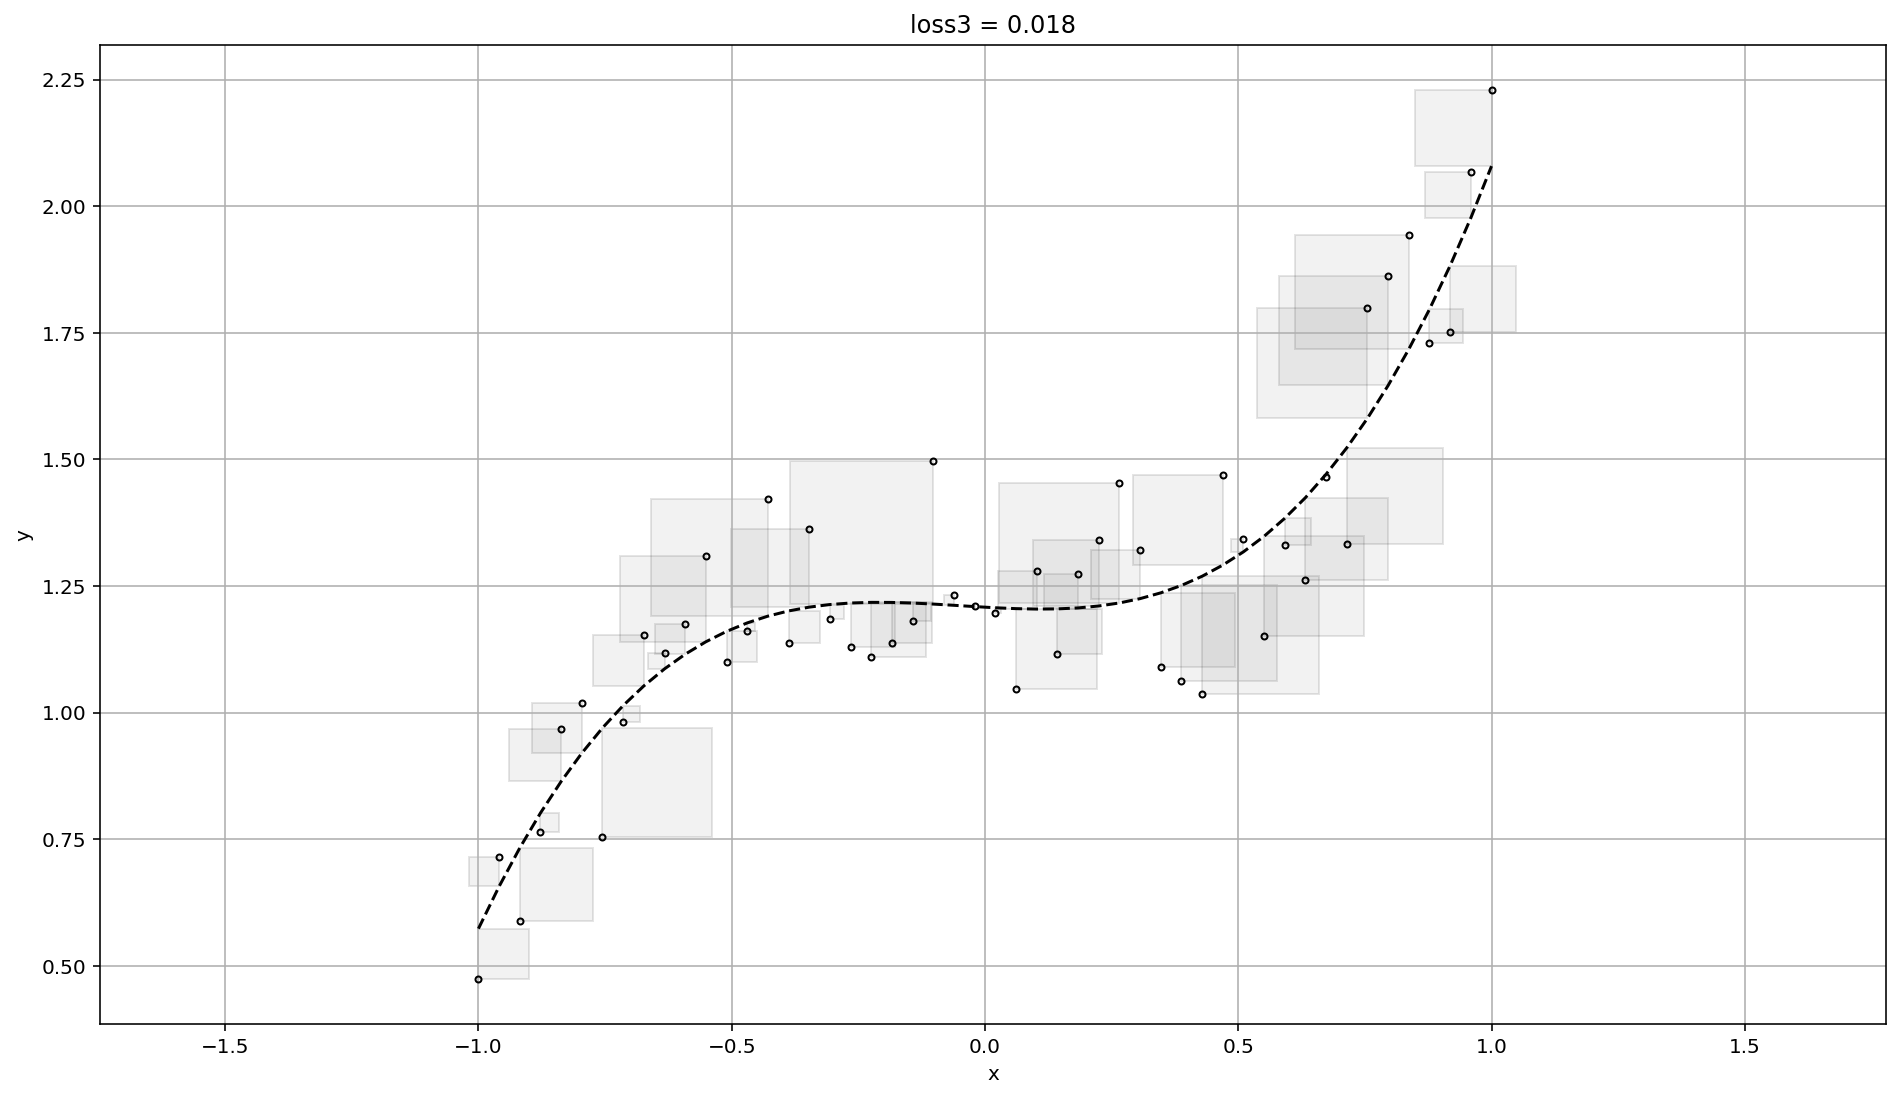

[[1. 1.]] [1.] 1.1056408
[[-0.27018595  0.03585691]] [1.215446] 0.13722548
[[-0.01640794  0.10837849]] [1.252276] 0.107143074


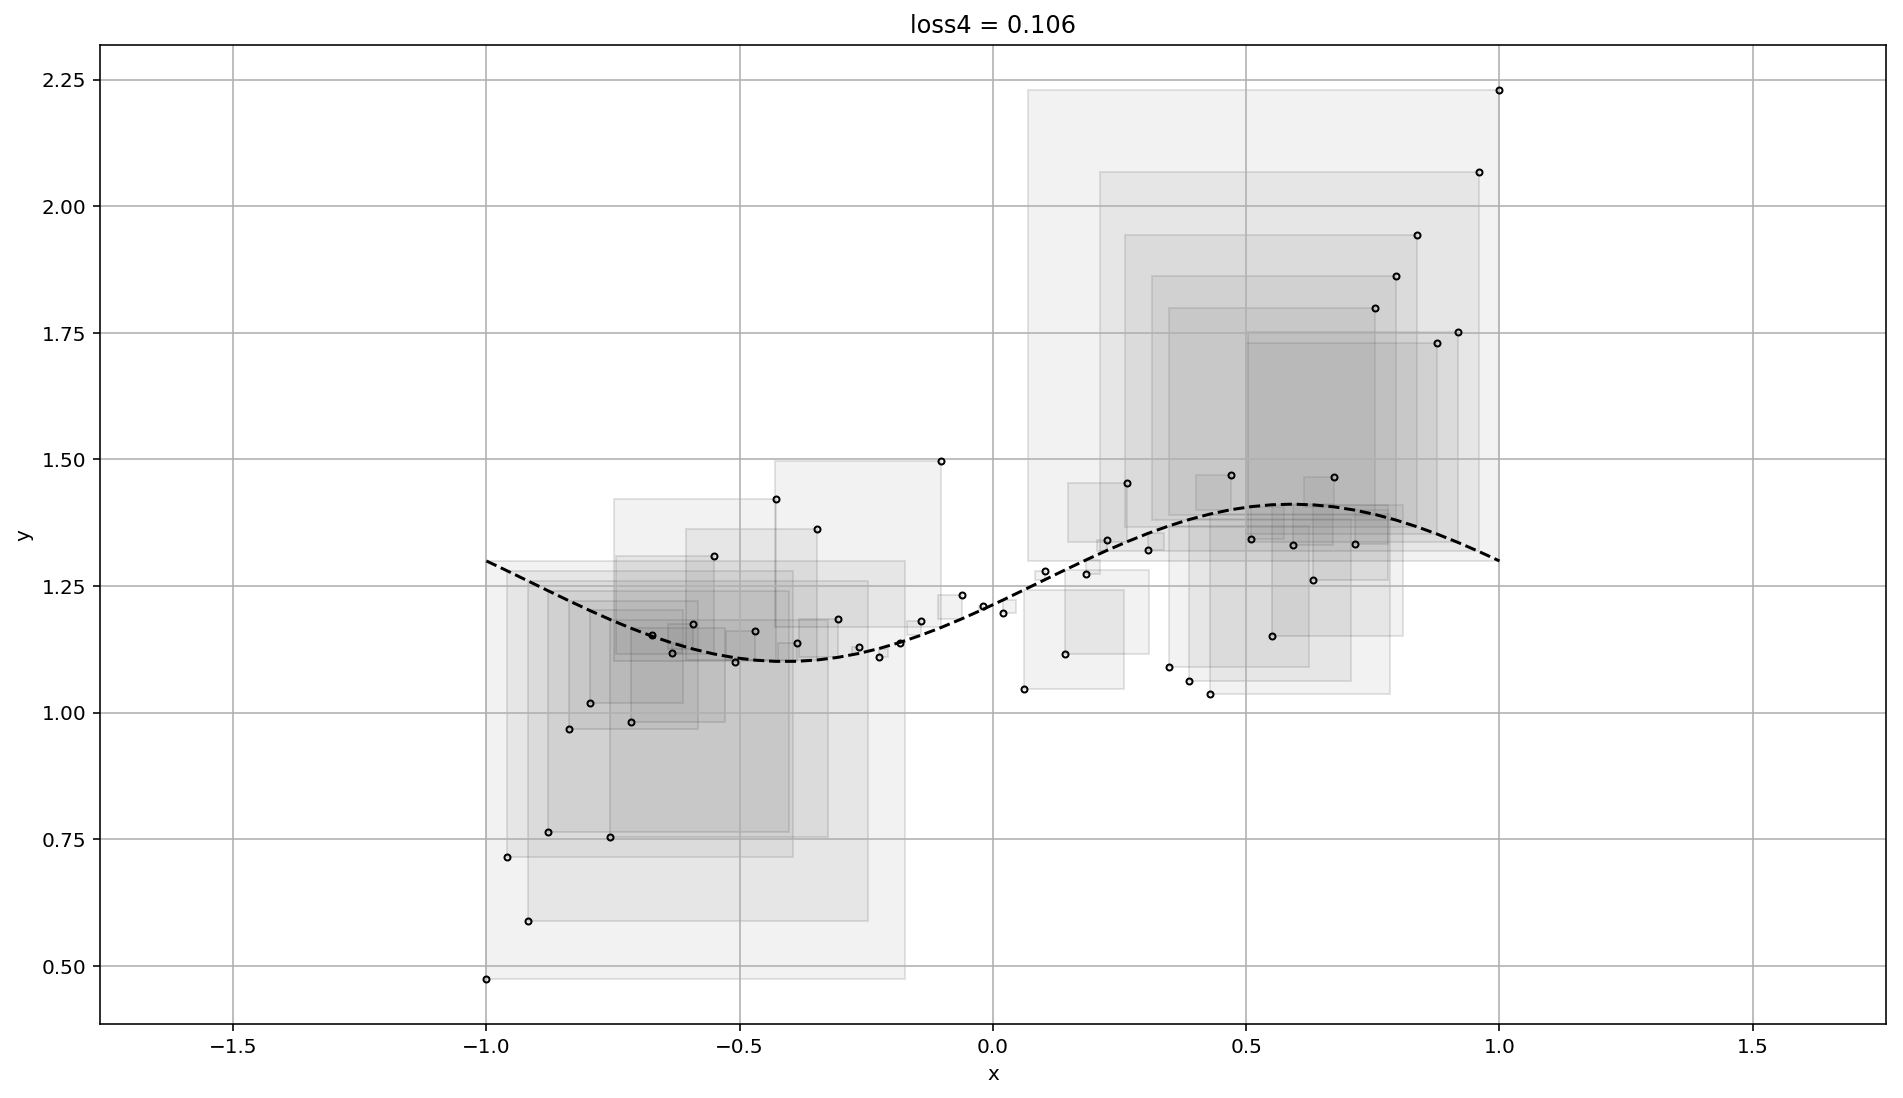

In [6]:
for i, features in enumerate([features1, features2, features3, features4], 1):
    # 예측모델과 손실함수
    num_features = features.shape[1]
    with tf.variable_scope("Feature{}".format(i)):
        w = tf.Variable(tf.ones([num_features, 1]))
        b = tf.Variable(tf.ones([1]))

    x = tf.placeholder(tf.float32, [None, num_features])
    y = tf.placeholder(tf.float32, [None, 1])
    yhat = tf.matmul(x, w) + b
    loss = tf.reduce_mean(tf.square( yhat - y ))

    # 수치최적화 알고리즘
    MaxEpoch = 15
    batch_size = 10
    lr = 0.1
    optimizer = tf.train.AdamOptimizer(lr)
    train = optimizer.minimize(loss)

    # 데이터 섞기
    np.random.seed(320)
    shuffled_id = np.arange(0, len(x_train))
    np.random.shuffle(shuffled_id)
    shuffled_x_train = features[shuffled_id]
    shuffled_y_train = labels[shuffled_id]

    # 스토캐스틱 방법
    from helper import generate_batches
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(MaxEpoch):
            if epoch % 5 == 0:
                curr_w, curr_b, curr_loss = sess.run([w, b, loss], feed_dict={x:features, y:labels})
                print(curr_w.reshape(1,-1), curr_b, curr_loss)
            for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
                sess.run(train, feed_dict={x:x_batch, y:y_batch})

        w_tf_sgd, b_tf_sgd = sess.run([w, b])
        prediction_values = sess.run(yhat, feed_dict={x:features})
        final_loss = sess.run(loss, feed_dict={x:features, y:labels})
        plt.title("loss{} = {:1.3f}".format(i, final_loss))
        visualize_l2(prediction_values, x_train, labels)
        plt.show()